In [134]:
import pandas as pd, numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 

Initial shape: (16860, 57)
X                   0.000000
Y                   0.000000
INDEX_              0.000000
ACCNUM              0.000000
YEAR                0.000000
DATE                0.000000
TIME                0.000000
HOUR                0.000000
STREET1             0.000000
STREET2             8.956109
OFFSET             83.712930
ROAD_CLASS          2.947805
DISTRICT            0.836299
WARDNUM             1.162515
DIVISION            1.162515
LATITUDE            0.000000
LONGITUDE           0.000000
LOCCOORD            0.622776
ACCLOC             32.325030
TRAFFCTL            0.172005
VISIBILITY          0.106762
LIGHT               0.000000
RDSFCOND            0.136418
ACCLASS             0.000000
IMPACTYPE           0.023725
INVTYPE             0.071174
INVAGE              0.000000
INJURY              9.561091
FATAL_NO           95.771056
INITDIR            29.027284
VEHTYPE            16.684460
MANOEUVER          42.900356
DRIVACT            49.810202
DRIVCOND        

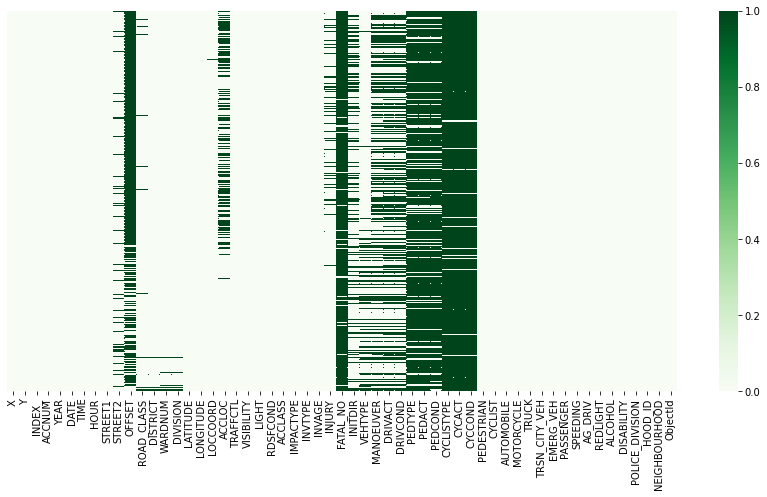

In [153]:
data = pd.read_csv('KSI.csv')
print("Initial shape:", data.shape)

# There are several columns consist of "Yes" and "<Null>" (where Null means No). 
# For these binary column, replace  "<Null>" with"No"
binary_cols = ['CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','TRSN_CITY_VEH','EMERG_VEH','SPEEDING','REDLIGHT','ALCOHOL','DISABILITY','PASSENGER','AG_DRIV','PEDESTRIAN']
data[binary_cols]=data[binary_cols].replace({'<Null>':0, 'Yes':1})

# Replace other '<Null>' with nan, printing percentage of missing values for each feature
data.replace('<Null>', np.nan, inplace=True)
data.replace(' ',np.nan,inplace=True)
print(data.isna().sum()/len(data)*100)

#The following heatmap shows the features having maximum missing values
fig, ax = plt.subplots(figsize=(15,7))
#heatmap to visualize features with most missing values
sns.heatmap(data.isnull(), yticklabels=False,cmap='Greens')
#shape
print(data.shape)

# Dropping columns where missing values were greater than 80%
drop_column = ['OFFSET','FATAL_NO','PEDTYPE','PEDACT','PEDCOND','CYCLISTYPE','CYCACT','CYCCOND']
data.drop(drop_column, axis=1, inplace=True)
#Drop irrelevant columns which are unique identifier
data.drop(['ObjectId','INDEX_'], axis=1, inplace=True)

print(data.shape)
print(data.isna().sum()/len(data)*100)

print(data.info())


#Changing the property damage and non-fatal columns to Non-Fatal¶
data['ACCLASS'] = np.where(data['ACCLASS'] == 'Property Damage Only', 'Non-Fatal', data['ACCLASS'])
data['ACCLASS'] = np.where(data['ACCLASS'] == 'Non-Fatal Injury', 'Non-Fatal', data['ACCLASS'])

data['ACCLASS'].unique()

## Verifying columns with object data type
print(data.select_dtypes(["object"]).columns)


# Neighbourhood is identical with Hood ID
#data.rename(columns={'Hood ID': 'Neighbourhood'}, inplace=True) # Neighbourhood is identical with Hood ID

# extract features: weekday,day, month 
data['DATE'] = pd.to_datetime(data['DATE'])
data['WEEKDAY'] =data['DATE'].dt.dayofweek
data['DAY'] = pd.to_datetime(data['DATE']).dt.day
data['MONTH'] = data['DATE'].dt.month

#Drop Date
data.drop(['DATE'], axis=1, inplace=True)

# Neighbourhood is identical with Hood ID, drop Neighbourhood
# Police DIVISION is identical with DIVISION
# X,Y are longitude and latitudes, dulicate, drop X and Y
data.drop(['NEIGHBOURHOOD','POLICE_DIVISION','X','Y'], axis=1, inplace=True)

# remove other irrelevant columns or columns contain to many missing values
data.drop(['MANOEUVER','DRIVACT','DRIVCOND','INITDIR','STREET1','STREET2','WARDNUM'], axis=1, inplace=True)

#Visualization

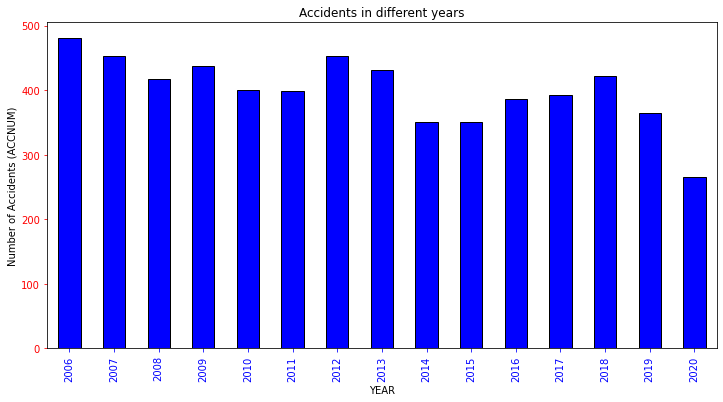

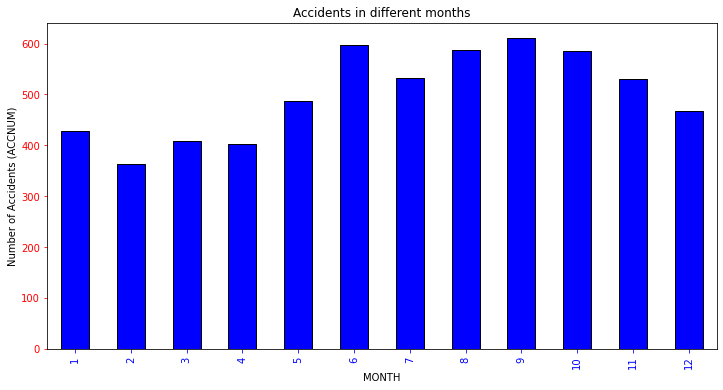

In [136]:

#Number of Unique accidents by Year
Num_accident = data.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents in different years")
plt.ylabel('Number of Accidents (ACCNUM)')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

#Number of Unique accidents by Month
Num_accident = data.groupby('MONTH')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents in different months")
plt.ylabel('Number of Accidents (ACCNUM)')

ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

#From the data above, accidents happened more from June to October

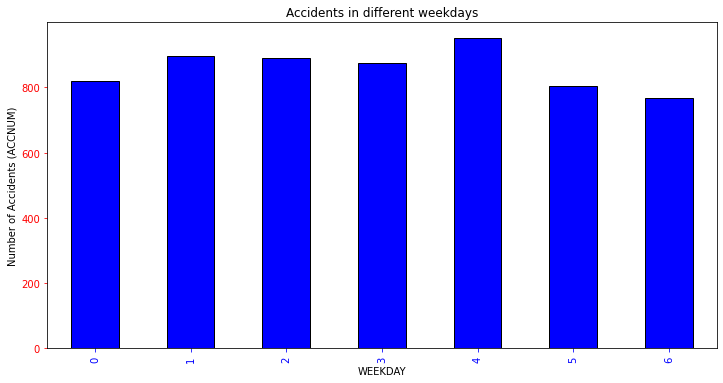

In [137]:
#Number of Unique accidents by Day
Num_accident = data.groupby('WEEKDAY')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents in different weekdays")
plt.ylabel('Number of Accidents (ACCNUM)')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

Text(0.5, 1.0, 'Vehicle type vs. occurance of accidents')

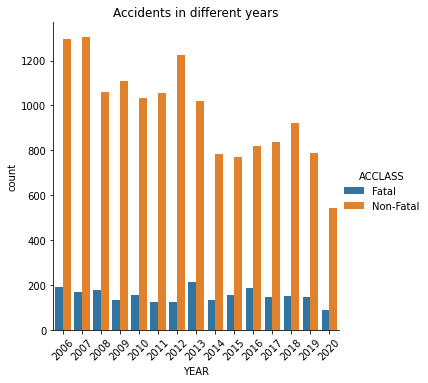

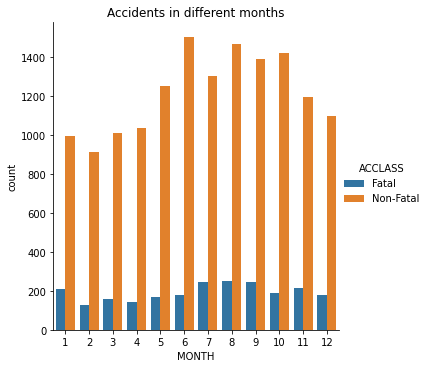

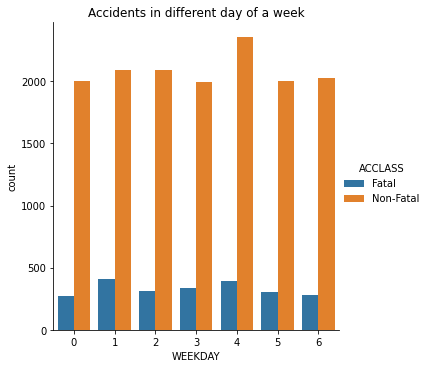

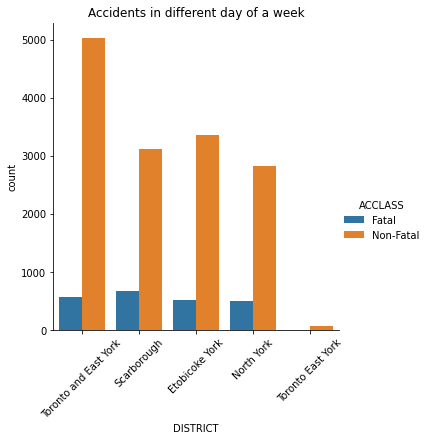

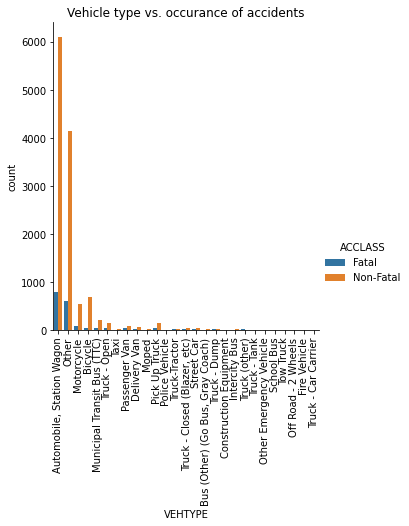

In [138]:
#Check the relation between features and target
#Year
ax=sns.catplot(x='YEAR', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=45)
plt.title("Accidents in different years")


#Month
ax=sns.catplot(x='MONTH', kind='count', data=data,  hue='ACCLASS')
plt.title("Accidents in different months")


#Month
ax=sns.catplot(x='WEEKDAY', kind='count', data=data,  hue='ACCLASS')
plt.title("Accidents in different day of a week")

#Neighborhood
ax=sns.catplot(x='DISTRICT', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=45)
plt.title("Accidents in different day of a week")

#Vehicle type
ax=sns.catplot(x='VEHTYPE', kind='count', data=data,  hue='ACCLASS')
ax.set_xticklabels(rotation=90)
plt.title("Vehicle type vs. occurance of accidents")

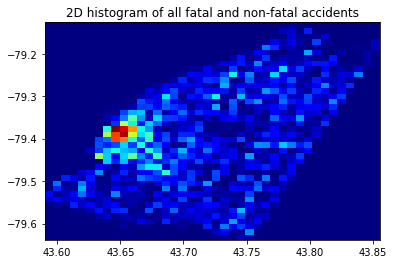

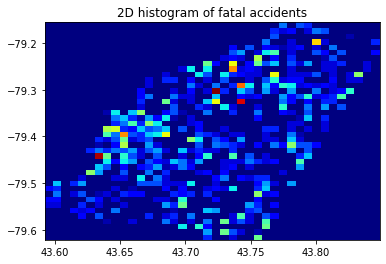

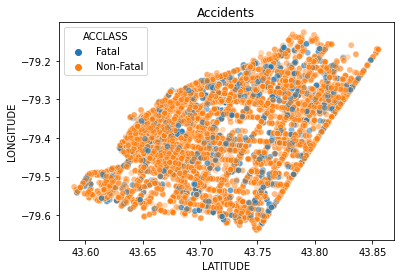

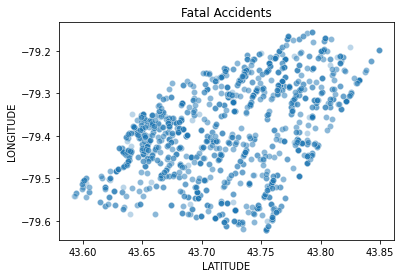

In [139]:
# Where does accident more likly to occur
#2D histogram
plt.hist2d(data['LATITUDE'], data['LONGITUDE'], bins=(40, 40), cmap=plt.cm.jet)
plt.title("2D histogram of all fatal and non-fatal accidents")
plt.show()

data_Fatal = data[data['ACCLASS'] == 'Fatal']
plt.hist2d(data_Fatal['LATITUDE'], data_Fatal['LONGITUDE'], bins=(40, 40), cmap=plt.cm.jet)
plt.title("2D histogram of fatal accidents")
plt.show()


# scatter plot of all fatal and non-fatal accidents
sns.scatterplot(x='LATITUDE', y='LONGITUDE', data = data, hue = "ACCLASS",alpha=0.3)
plt.title("Accidents")
plt.show()
#scatter plot of fatal accidents
sns.scatterplot(x='LATITUDE', y='LONGITUDE', data = data[data['ACCLASS'] == 'Fatal'],alpha=0.3)
plt.title("Fatal Accidents")
plt.show()




In [140]:
data.shape
data.dtypes


ACCNUM             int64
YEAR               int64
TIME               int64
HOUR               int64
ROAD_CLASS        object
DISTRICT          object
DIVISION          object
LATITUDE         float64
LONGITUDE        float64
LOCCOORD          object
ACCLOC            object
TRAFFCTL          object
VISIBILITY        object
LIGHT             object
RDSFCOND          object
ACCLASS           object
IMPACTYPE         object
INVTYPE           object
INVAGE            object
INJURY            object
VEHTYPE           object
PEDESTRIAN         int64
CYCLIST            int64
AUTOMOBILE         int64
MOTORCYCLE         int64
TRUCK              int64
TRSN_CITY_VEH      int64
EMERG_VEH          int64
PASSENGER          int64
SPEEDING           int64
AG_DRIV            int64
REDLIGHT           int64
ALCOHOL            int64
DISABILITY         int64
HOOD_ID            int64
WEEKDAY            int64
DAY                int64
MONTH              int64
dtype: object

#Further Data Cleaning

In [154]:
#ACCNUM is identifier, drop
data.drop(['ACCNUM'], axis=1, inplace=True)

print(data.isna().sum()/len(data)*100)

#several columns <3% missing values, 
#catagorical feature, not make much sense if impute, so keep the features, just discard these rows with missing values
data.dropna(subset=['ROAD_CLASS', 'DISTRICT','VISIBILITY','RDSFCOND','LOCCOORD','IMPACTYPE','DIVISION','TRAFFCTL','INVTYPE'],inplace=True)


YEAR              0.000000
TIME              0.000000
HOUR              0.000000
ROAD_CLASS        2.947805
DISTRICT          0.836299
DIVISION          1.162515
LATITUDE          0.000000
LONGITUDE         0.000000
LOCCOORD          0.622776
ACCLOC           32.325030
TRAFFCTL          0.172005
VISIBILITY        0.106762
LIGHT             0.000000
RDSFCOND          0.136418
ACCLASS           0.000000
IMPACTYPE         0.023725
INVTYPE           0.071174
INVAGE            0.000000
INJURY            9.561091
VEHTYPE          16.684460
PEDESTRIAN        0.000000
CYCLIST           0.000000
AUTOMOBILE        0.000000
MOTORCYCLE        0.000000
TRUCK             0.000000
TRSN_CITY_VEH     0.000000
EMERG_VEH         0.000000
PASSENGER         0.000000
SPEEDING          0.000000
AG_DRIV           0.000000
REDLIGHT          0.000000
ALCOHOL           0.000000
DISABILITY        0.000000
HOOD_ID           0.000000
WEEKDAY           0.000000
DAY               0.000000
MONTH             0.000000
d

In [142]:
#target class
data['ACCLASS']=data['ACCLASS'].replace({'Non-Fatal':0, 'Fatal':1})
data['ACCLASS'].value_counts()   #dataset is unbalanced

0    13994
1     2155
Name: ACCLASS, dtype: int64

In [143]:
#Test Train split
#Since the dataset is unbalanced, use straified split
X = data.drop(["ACCLASS"], axis=1)
y= data["ACCLASS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5,stratify=y)

In [144]:
#impute
from sklearn.impute import SimpleImputer    
imputer = SimpleImputer(strategy="constant",fill_value='missing')  
data_tr=imputer.fit_transform(X_train)
data_tr= pd.DataFrame(data_tr, columns=X_train.columns)

print(data_tr.isna().sum()/len(data_tr)*100)

YEAR             0.0
TIME             0.0
HOUR             0.0
ROAD_CLASS       0.0
DISTRICT         0.0
DIVISION         0.0
LATITUDE         0.0
LONGITUDE        0.0
LOCCOORD         0.0
ACCLOC           0.0
TRAFFCTL         0.0
VISIBILITY       0.0
LIGHT            0.0
RDSFCOND         0.0
IMPACTYPE        0.0
INVTYPE          0.0
INVAGE           0.0
INJURY           0.0
VEHTYPE          0.0
PEDESTRIAN       0.0
CYCLIST          0.0
AUTOMOBILE       0.0
MOTORCYCLE       0.0
TRUCK            0.0
TRSN_CITY_VEH    0.0
EMERG_VEH        0.0
PASSENGER        0.0
SPEEDING         0.0
AG_DRIV          0.0
REDLIGHT         0.0
ALCOHOL          0.0
DISABILITY       0.0
HOOD_ID          0.0
WEEKDAY          0.0
DAY              0.0
MONTH            0.0
dtype: float64


In [145]:
#numerical features
num_columns=['YEAR', 'TIME', 'HOUR', 'LATITUDE', 'LONGITUDE', 
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_ID', 'WEEKDAY', 'DAY',
       'MONTH']
data_num =data_tr[num_columns] 
#data_num = data_tr.select_dtypes(include=[np.number])
print(data_num.columns)

#categorical features
cat_columns=['ROAD_CLASS', 'DISTRICT', 'DIVISION', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND','IMPACTYPE', 'INVTYPE',
       'INVAGE', 'INJURY', 'VEHTYPE']
categoricalData =data_tr[cat_columns]
#categoricalData= data_tr.select_dtypes(exclude=[np.number])
print(categoricalData.columns)
data_cat = pd.get_dummies(categoricalData, columns=cat_columns, drop_first=True)
data_cat

df=pd.concat([data_num, data_cat], axis=1)
df


Index(['YEAR', 'TIME', 'HOUR', 'LATITUDE', 'LONGITUDE', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'HOOD_ID', 'WEEKDAY', 'DAY', 'MONTH'],
      dtype='object')
Index(['ROAD_CLASS', 'DISTRICT', 'DIVISION', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL',
       'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'VEHTYPE'],
      dtype='object')


,YEAR,TIME,HOUR,LATITUDE,LONGITUDE,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,...,VEHTYPE_Taxi,VEHTYPE_Tow Truck,VEHTYPE_Truck (other),VEHTYPE_Truck - Car Carrier,"VEHTYPE_Truck - Closed (Blazer, etc)",VEHTYPE_Truck - Dump,VEHTYPE_Truck - Open,VEHTYPE_Truck - Tank,VEHTYPE_Truck-Tractor,VEHTYPE_missing
0,2007,905,9,43.752045,-79.54239,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,1940,19,43.669528,-79.43951,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2007,129,1,43.743745,-79.21169,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2007,1610,16,43.746445,-79.39159,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2007,930,9,43.656645,-79.38109,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12914,2020,1227,12,43.770354,-79.381053,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
12915,2008,1540,15,43.755045,-79.35029,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12916,2020,1345,13,43.775935,-79.18922,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12917,2015,1322,13,43.769263,-79.412891,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [146]:
##################

# Pipelines

#################
# build a pipeline for preprocessing the categorical attributes
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant",fill_value='missing')),
        ('one_hot', OneHotEncoder(drop='first')),
    ])
# build a pipeline for preprocessing the numerical attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])
#full transformation Column Transformer
num_attribs = num_columns
cat_attribs = cat_columns

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared.toarray()


array([[-1.2428827 , -0.72486628, -0.68749892, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.60988475,  0.92956409,  0.9090567 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.2428827 , -1.96528944, -1.96474342, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.84761537, -0.02153356, -0.04887667, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65896227, -0.05829868, -0.04887667, ...,  0.        ,
         0.        ,  1.        ],
       [-1.2428827 , -1.14366894, -1.16646561, ...,  0.        ,
         0.        ,  0.        ]])

In [147]:
X_train_prepared.shape

(12919, 207)

#Feature Selection

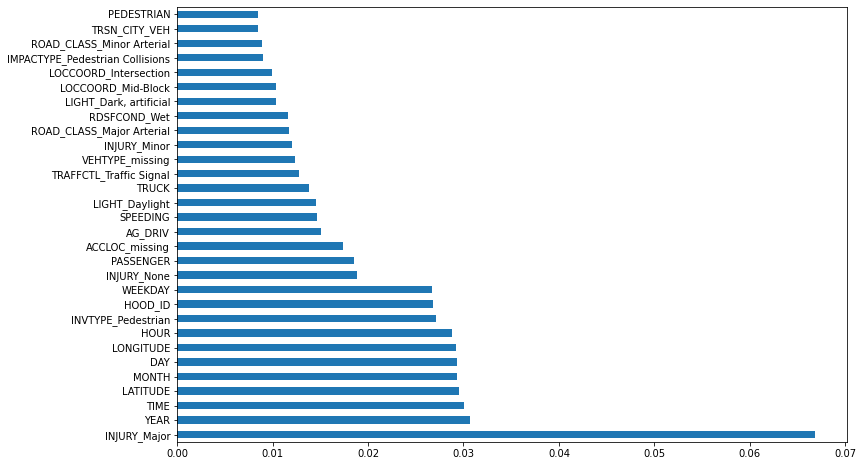

In [148]:
#method 1: using ExtraTreesClassifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train_prepared,y_train)
#print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=df.columns)

#plot the most important 30 features 
fig = plt.gcf()
fig.set_size_inches(12, 8)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [149]:
#method 2: using SelectFromModel and RandomForestClassifier to select features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train_prepared, y_train)
selected_feat= df.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['YEAR', 'TIME', 'HOUR', 'LATITUDE', 'LONGITUDE', 'PEDESTRIAN',
       'AUTOMOBILE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING',
       'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'HOOD_ID', 'WEEKDAY', 'DAY', 'MONTH',
       'ROAD_CLASS_Major Arterial', 'ROAD_CLASS_Minor Arterial',
       'DISTRICT_North York', 'DISTRICT_Toronto and East York',
       'LOCCOORD_Intersection', 'LOCCOORD_Mid-Block',
       'ACCLOC_Non Intersection', 'ACCLOC_missing', 'TRAFFCTL_Traffic Signal',
       'VISIBILITY_Rain', 'LIGHT_Dark, artificial', 'LIGHT_Daylight',
       'RDSFCOND_Wet', 'IMPACTYPE_Approaching',
       'IMPACTYPE_Pedestrian Collisions', 'IMPACTYPE_SMV Other',
       'IMPACTYPE_Turning Movement', 'INVTYPE_Driver', 'INVTYPE_Passenger',
       'INVTYPE_Pedestrian', 'INVAGE_25 to 29', 'INVAGE_unknown',
       'INJURY_Major', 'INJURY_Minimal', 'INJURY_Minor', 'INJURY_None',
       'VEHTYPE_Other', 'VEHTYPE_missing'],
      dtype='object')


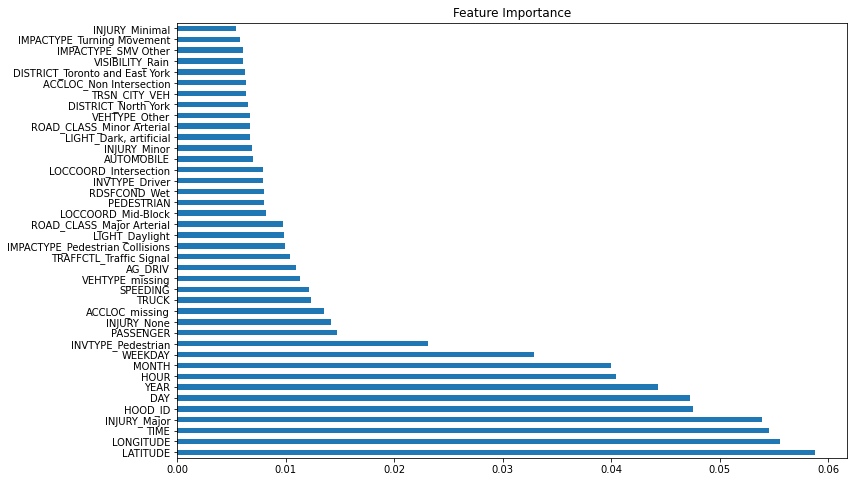

In [150]:
feat_importances = pd.Series(sel.estimator_.feature_importances_, index=df.columns)
#plot the selected features
fig = plt.gcf()
fig.set_size_inches(12, 8)
feat_importances.nlargest(40).plot(kind='barh')
plt.title("Feature Importance")
plt.show()

# Model Training,Tuning and Testing

In [151]:
df_X_train_prepared= pd.DataFrame(X_train_prepared.toarray(), columns=df.columns)

In [152]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
LR_clf= LogisticRegression()
selected=['YEAR', 'TIME', 'HOUR', 'LATITUDE', 'LONGITUDE', 'PEDESTRIAN',    #features selected in last step
       'AUTOMOBILE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING',
       'AG_DRIV', 'REDLIGHT', 'HOOD_ID', 'WEEKDAY', 'DAY', 'MONTH',
       'ROAD_CLASS_Major Arterial', 'ROAD_CLASS_Minor Arterial',
       'DISTRICT_North York', 'DISTRICT_Toronto and East York',
       'LOCCOORD_Intersection', 'LOCCOORD_Mid-Block',
       'ACCLOC_Non Intersection', 'ACCLOC_missing', 'TRAFFCTL_Traffic Signal',
       'VISIBILITY_Rain', 'LIGHT_Dark, artificial', 'LIGHT_Daylight',
       'RDSFCOND_Wet', 'IMPACTYPE_Approaching',
       'IMPACTYPE_Pedestrian Collisions', 'IMPACTYPE_Rear End',
       'IMPACTYPE_SMV Other', 'IMPACTYPE_Turning Movement', 'INVTYPE_Driver',
       'INVTYPE_Passenger', 'INVTYPE_Pedestrian', 'INVAGE_25 to 29',
       'INVAGE_unknown', 'INJURY_Major', 'INJURY_Minimal', 'INJURY_Minor',
       'INJURY_None', 'VEHTYPE_Other', 'VEHTYPE_missing']
X_train_selected=df_X_train_prepared[selected]
LR_clf.fit(X_train_selected, y_train)
#accuracy on training dataset
LR_clf.score(X_train_selected,y_train)

#test
X_test_prepared = full_pipeline.transform(X_test)
df_X_test_prepared= pd.DataFrame(X_test_prepared.toarray(), columns=df.columns)  #transform the test dataset into dataframe, then slice the obtained dataset with selected features
y_test_pred=LR_clf.predict(df_X_test_prepared[selected])

from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95      2799
           1       0.94      0.41      0.57       431

    accuracy                           0.92      3230
   macro avg       0.93      0.70      0.76      3230
weighted avg       0.92      0.92      0.90      3230



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
